In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/drive/My Drive/Drug Interaction/project_results/merged_results_correlation_edition_final.csv")

In [2]:
import pandas as pd
import re
from tqdm import tqdm
import polars as pl
from joblib import Parallel, delayed
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Basic structure of the data
print("Structure of the data:")
print(df.info())

Structure of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089718 entries, 0 to 1089717
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Unnamed: 0         1089718 non-null  int64 
 1   pre_id             1089718 non-null  int64 
 2   natinal_id         1089718 non-null  int64 
 3   sex                1089718 non-null  int64 
 4   age_years          1089718 non-null  int64 
 5   speciality         1089718 non-null  object
 6   pre_month          1089718 non-null  int64 
 7   drug_count         1089718 non-null  int64 
 8   interaction_count  1089718 non-null  int64 
 9   Contraindicated    1089718 non-null  int64 
 10  Major              1089718 non-null  int64 
 11  Moderate           1089718 non-null  int64 
 12  age_group          1089718 non-null  object
 13  age_groups         1089718 non-null  object
dtypes: int64(11), object(3)
memory usage: 116.4+ MB
None


In [ ]:
df

,Unnamed: 0,pre_id,natinal_id,sex,age_years,speciality,pre_month,drug_count,interaction_count,Contraindicated,Major,Moderate,age_group,age_groups
0,0,2,2,0,60,Cardiology,1,10,8,0,6,2,40-64,40-64
1,1,3,3,1,66,Emergency medicine,1,7,1,0,1,0,65+,65+
2,2,4,4,1,78,General practice,1,7,4,0,1,3,65+,65+
3,3,6,6,0,79,Orthopedics,1,4,1,1,0,0,65+,65+
4,4,8,8,1,51,Emergency medicine,1,10,1,0,1,0,40-64,40-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089713,1089713,3093340,82117,1,70,General practice,12,4,1,1,0,0,65+,65+
1089714,1089714,3093342,275629,1,56,PT and rehabilitation,12,4,1,0,1,0,40-64,40-64
1089715,1089715,3093364,196198,1,59,Neurology,12,6,2,0,2,0,40-64,40-64
1089716,1089716,3093386,39534,0,61,Internal medicine,12,7,3,0,0,3,40-64,40-64


In [ ]:
save_path = '/content/drive/MyDrive/Drug Interaction/project_results/Regression analysis/Regression_only_with_interaction.csv'
# Load your DataFrame (replace 'your_dataframe' with the actual DataFrame)
df.to_csv(save_path, index=False)

In [3]:
df_interaction = pd.read_csv('/content/drive/MyDrive/Drug Interaction/project_results/merged_results_final_edition_without_duplicates_and_insulin_errors.csv')

In [5]:
df_interaction

,pre_id,natinal_id,sex,age_years,speciality,pre_month,drug_count,IHIO_cost,total_cost,target_drug,interacting_agent,documentation,severity,prescribed_drug,interacting_drug_full_name,interaction_count
0,2,2,0,60,Cardiology,1,10,252000,465000,CARVEDILOL,ACETYLSALICYLIC ACID,Good,Moderate,CARVEDILOL TABLET ORAL 6.25 MG,"ASA (ACETYLSALICYLIC ACID) TABLET, DELAYED REL...",8
1,2,2,0,60,Cardiology,1,10,214200,306000,CARVEDILOL,FLUOXETINE,Fair,Major,CARVEDILOL TABLET ORAL 6.25 MG,FLUOXETINE CAPSULE ORAL 20 MG,8
2,2,2,0,60,Cardiology,1,10,63000,90042,FUROSEMIDE,VALSARTAN,Fair,Major,FUROSEMIDE TABLET ORAL 40 MG,-SACUBITRIL / VALSARTAN TABLET ORAL 97 MG/103 MG,8
3,2,2,0,60,Cardiology,1,10,147000,315000,ACETYLSALICYLIC ACID,FUROSEMIDE,Fair,Major,"ASA (ACETYLSALICYLIC ACID) TABLET, DELAYED REL...",FUROSEMIDE TABLET ORAL 40 MG,8
4,2,2,0,60,Cardiology,1,10,134400,585000,ACETYLSALICYLIC ACID,SPIRONOLACTONE,Good,Major,"ASA (ACETYLSALICYLIC ACID) TABLET, DELAYED REL...",SPIRONOLACTONE TABLET ORAL 25 MG,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606196,3093364,196198,1,59,Neurology,12,6,0,0,CLONAZEPAM,TRIFLUOPERAZINE,Fair,Major,CLONAZEPAM TABLET ORAL 1 MG,TRIFLUOPERAZINE TABLET ORAL 1 MG,2
2606197,3093386,39534,0,61,Internal medicine,12,7,0,0,BISOPROLOL FUMARATE,METFORMIN,Good,Moderate,BISOPROLOL FUMARATE TABLET ORAL 5 MG,-EMPAGLIFLOZIN / METFORMIN HYDROCHLORIDE TABLE...,3
2606198,3093386,39534,0,61,Internal medicine,12,7,0,0,VALSARTAN,EPLERENONE,Fair,Moderate,SACUBITRIL/VALSARTAN TABLET ORAL 24 MG/26 MG,EPLERENONE TABLET ORAL 25 MG,3
2606199,3093386,39534,0,61,Internal medicine,12,7,0,0,METFORMIN,EPLERENONE,Fair,Moderate,-EMPAGLIFLOZIN / METFORMIN HYDROCHLORIDE TABLE...,EPLERENONE TABLET ORAL 25 MG,3


In [4]:
df_interaction['pre_id'].nunique()

1089718

In [6]:
print(df_interaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2606201 entries, 0 to 2606200
Data columns (total 16 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   pre_id                      int64 
 1   natinal_id                  int64 
 2   sex                         int64 
 3   age_years                   int64 
 4   speciality                  object
 5   pre_month                   int64 
 6   drug_count                  int64 
 7   IHIO_cost                   int64 
 8   total_cost                  int64 
 9   target_drug                 object
 10  interacting_agent           object
 11  documentation               object
 12  severity                    object
 13  prescribed_drug             object
 14  interacting_drug_full_name  object
 15  interaction_count           int64 
dtypes: int64(9), object(7)
memory usage: 318.1+ MB
None


In [9]:
df_interaction.describe()

,pre_id,natinal_id,sex,age_years,pre_month,drug_count,IHIO_cost,total_cost,interaction_count
count,2.606201e+06,2.606201e+06,2.606201e+06,2.606201e+06,2.606201e+06,2.606201e+06,2.606201e+06,2.606201e+06,2.606201e+06
mean,1.546910e+06,3.654193e+05,5.763922e-01,5.724121e+01,7.211995e+00,7.302721e+00,7.709235e+05,1.359100e+06,4.593443e+00
std,9.008602e+05,2.947875e+05,4.941299e-01,1.763109e+01,3.319292e+00,3.117116e+00,1.906180e+06,4.073627e+06,4.086069e+00
min,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,7.523010e+05,1.228270e+05,0.000000e+00,4.900000e+01,4.000000e+00,5.000000e+00,1.167000e+05,2.250000e+05,2.000000e+00
50%,1.550672e+06,2.819950e+05,1.000000e+00,6.000000e+01,7.000000e+00,7.000000e+00,3.193000e+05,5.251400e+05,3.000000e+00
75%,2.337980e+06,5.577880e+05,1.000000e+00,7.000000e+01,1.000000e+01,9.000000e+00,7.669500e+05,1.278000e+06,6.000000e+00
max,3.093450e+06,1.115206e+06,1.000000e+00,1.090000e+02,1.200000e+01,4.100000e+01,4.685349e+08,2.177280e+09,4.700000e+01


In [10]:
import pandas as pd
import numpy as np

# Assume your DataFrame is called df and has the columns:
# ['pre_id', 'target_drug', 'interacting_agent', 'severity', 'pre_month', 'sex', 'age_years', 'speciality']

# --- STEP 1: Normalize the drug pairs (treat A-B same as B-A) ---
def normalize_pair(row):
    drugs = sorted([row['target_drug'], row['interacting_agent']])
    return f"{drugs[0]} - {drugs[1]}"

df_interaction['drug_pair'] = df_interaction.apply(normalize_pair, axis=1)

# --- STEP 2: Create age group ---
bins = [0, 18, 39, 64, np.inf]
labels = ['0-18', '19-39', '40-64', '65+']
df_interaction['age_group'] = pd.cut(df_interaction['age_years'], bins=bins, labels=labels, right=True)


In [11]:
top5_overall = df_interaction['drug_pair'].value_counts().head(5).reset_index()
top5_overall.columns = ['drug_pair', 'count']
top5_overall

,drug_pair,count
0,ACETYLSALICYLIC ACID - METFORMIN,61401
1,ACETYLSALICYLIC ACID - NITROGLYCERIN,54210
2,KETOROLAC - NAPROXEN,46201
3,ACETYLSALICYLIC ACID - METOPROLOL TARTRATE,44666
4,ACETYLSALICYLIC ACID - CLOPIDOGREL,37956


In [12]:
top5_by_sex = (
    df_interaction.groupby(['sex', 'drug_pair'])
    .size()
    .reset_index(name='count')
    .sort_values(['sex', 'count'], ascending=[True, False])
    .groupby('sex')
    .head(5)
)
top5_by_sex

,sex,drug_pair,count
304,0,ACETYLSALICYLIC ACID - NITROGLYCERIN,28706
295,0,ACETYLSALICYLIC ACID - METFORMIN,27058
249,0,ACETYLSALICYLIC ACID - CLOPIDOGREL,24106
300,0,ACETYLSALICYLIC ACID - METOPROLOL TARTRATE,21041
734,0,ATORVASTATIN - CLOPIDOGREL,18806
4316,1,ACETYLSALICYLIC ACID - METFORMIN,34343
7373,1,KETOROLAC - NAPROXEN,28153
4325,1,ACETYLSALICYLIC ACID - NITROGLYCERIN,25504
4321,1,ACETYLSALICYLIC ACID - METOPROLOL TARTRATE,23625
4296,1,ACETYLSALICYLIC ACID - HYDROCHLOROTHIAZIDE,21620


In [13]:
top5_by_age_group = (
    df_interaction.groupby(['age_group', 'drug_pair'], observed=True)
    .size()
    .reset_index(name='count')
    .sort_values(['age_group', 'count'], ascending=[True, False])
    .groupby('age_group', observed=True)
    .head(5)
)
top5_by_age_group

<ipython-input-13-8d417198db89>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_interaction.groupby(['age_group', 'drug_pair'])
<ipython-input-13-8d417198db89>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('age_group')


,age_group,drug_pair,count
1580,0-18,CETIRIZINE - DIPHENHYDRAMINE,7190
909,0-18,AZITHROMYCIN - ONDANSETRON,4520
2803,0-18,FAMOTIDINE - ONDANSETRON,3938
3611,0-18,KETOROLAC - NAPROXEN,3517
373,0-18,ADULT COLD - DEXTROMETHORPHAN,3011
8102,19-39,KETOROLAC - NAPROXEN,12548
7294,19-39,FAMOTIDINE - ONDANSETRON,6522
6071,19-39,CETIRIZINE - DIPHENHYDRAMINE,6155
6764,19-39,DEXAMETHASONE - NAPROXEN,5855
5372,19-39,AZITHROMYCIN - FAMOTIDINE,4896


In [14]:
top5_by_month = (
    df_interaction.groupby(['pre_month', 'drug_pair'])
    .size()
    .reset_index(name='count')
    .sort_values(['pre_month', 'count'], ascending=[True, False])
    .groupby('pre_month')
    .head(5)
)
top5_by_month

,pre_month,drug_pair,count
200,1,ACETYLSALICYLIC ACID - METFORMIN,2142
209,1,ACETYLSALICYLIC ACID - NITROGLYCERIN,2090
2243,1,KETOROLAC - NAPROXEN,1999
205,1,ACETYLSALICYLIC ACID - METOPROLOL TARTRATE,1730
182,1,ACETYLSALICYLIC ACID - HYDROCHLOROTHIAZIDE,1283
3014,2,ACETYLSALICYLIC ACID - METFORMIN,4738
3023,2,ACETYLSALICYLIC ACID - NITROGLYCERIN,4207
3019,2,ACETYLSALICYLIC ACID - METOPROLOL TARTRATE,3604
2971,2,ACETYLSALICYLIC ACID - CLOPIDOGREL,2802
2995,2,ACETYLSALICYLIC ACID - HYDROCHLOROTHIAZIDE,2763


In [15]:
top5_by_speciality = (
    df_interaction.groupby(['speciality', 'drug_pair'])
    .size()
    .reset_index(name='count')
    .sort_values(['speciality', 'count'], ascending=[True, False])
    .groupby('speciality')
    .head(5)
)
top5_by_speciality

,speciality,drug_pair,count
70,Aerospace and undersea medicine,LEVOFLOXACIN - PREDNISOLONE,14
50,Aerospace and undersea medicine,FAMOTIDINE - LEVOFLOXACIN,9
65,Aerospace and undersea medicine,KETOROLAC - MELOXICAM,9
66,Aerospace and undersea medicine,KETOROLAC - NAPROXEN,8
26,Aerospace and undersea medicine,AZITHROMYCIN - FAMOTIDINE,6
...,...,...,...
37476,Urology,CIPROFLOXACIN - DICLOFENAC,1208
37440,Urology,CELECOXIB - TAMSULOSIN,932
38264,Urology,TADALAFIL - TAMSULOSIN,861
37652,Urology,DICLOFENAC - HYDROCHLOROTHIAZIDE,591


In [16]:
with pd.ExcelWriter("top_5_drug_pairs_analysis.xlsx") as writer:
    top5_overall.to_excel(writer, sheet_name="Overall", index=False)
    top5_by_sex.to_excel(writer, sheet_name="By Sex", index=False)
    top5_by_age_group.to_excel(writer, sheet_name="By Age Group", index=False)
    top5_by_month.to_excel(writer, sheet_name="By Month", index=False)
    top5_by_speciality.to_excel(writer, sheet_name="By Speciality", index=False)

In [17]:
top3_overall = (
    df_interaction.groupby(['severity', 'drug_pair'], observed=True)
    .size()
    .reset_index(name='count')
    .sort_values(['severity', 'count'], ascending=[True, False])
    .groupby('severity', observed=True)
    .head(3)  # Top 3 per severity
)

print(top3_overall)

             severity                                   drug_pair  count
86    Contraindicated                        KETOROLAC - NAPROXEN  46201
50    Contraindicated                      DICLOFENAC - KETOROLAC  23011
32    Contraindicated                       CELECOXIB - KETOROLAC  13320
393             Major            ACETYLSALICYLIC ACID - METFORMIN  61401
353             Major          ACETYLSALICYLIC ACID - CLOPIDOGREL  37956
380             Major  ACETYLSALICYLIC ACID - HYDROCHLOROTHIAZIDE  34943
3521         Moderate        ACETYLSALICYLIC ACID - NITROGLYCERIN  54210
3520         Moderate  ACETYLSALICYLIC ACID - METOPROLOL TARTRATE  44666
3505         Moderate  ACETYLSALICYLIC ACID - BISOPROLOL FUMARATE  33023


In [18]:
import pandas as pd

# Function to get top 3 pairs by severity for a specific column
def get_top3_by_group(df, group_col):
    top3 = (
        df.groupby([group_col, 'severity', 'drug_pair'], observed=True)
        .size()
        .reset_index(name='count')
        .sort_values(['severity', group_col, 'count'], ascending=[True, True, False])
        .groupby([group_col, 'severity'], observed=True)
        .head(3)
    )
    return top3

# Extract for each classification
top3_by_age = get_top3_by_group(df_interaction, 'age_group')
top3_by_sex = get_top3_by_group(df_interaction, 'sex')
top3_by_speciality = get_top3_by_group(df_interaction, 'speciality')
top3_by_month = get_top3_by_group(df_interaction, 'pre_month')

# Optional: save to Excel or CSV
top3_by_age.to_csv("top3_by_age.csv", index=False)
top3_by_sex.to_csv("top3_by_sex.csv", index=False)
top3_by_speciality.to_csv("top3_by_speciality.csv", index=False)
top3_by_month.to_csv("top3_by_month.csv", index=False)


In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/Drug Interaction/Drugs List - IHIO/drug_interaction_sorted_without_duplicate_at_least_two_drugs_11.4M_final_with_drug_counts.csv')

In [ ]:
df = df.drop(columns=['age_groups', 'Unnamed: 0'])
df

,pre_id,natinal_id,sex,age_years,speciality,pre_month,drug_count,interaction_count,Contraindicated,Major,Moderate,age_group
0,2,2,0,60,Cardiology,1,10,8,0,6,2,40-64
1,3,3,1,66,Emergency medicine,1,7,1,0,1,0,65+
2,4,4,1,78,General practice,1,7,4,0,1,3,65+
3,6,6,0,79,Orthopedics,1,4,1,1,0,0,65+
4,8,8,1,51,Emergency medicine,1,10,1,0,1,0,40-64
...,...,...,...,...,...,...,...,...,...,...,...,...
1089713,3093340,82117,1,70,General practice,12,4,1,1,0,0,65+
1089714,3093342,275629,1,56,PT and rehabilitation,12,4,1,0,1,0,40-64
1089715,3093364,196198,1,59,Neurology,12,6,2,0,2,0,40-64
1089716,3093386,39534,0,61,Internal medicine,12,7,3,0,0,3,40-64


In [ ]:
df_unique = df_interaction.drop_duplicates(subset = 'pre_id')
df_unique.describe()

,pre_id,natinal_id,sex,age_years,pre_month,drug_count,interaction_count,Contraindicated,Major,Moderate
count,2.365811e+06,2.365811e+06,2.365811e+06,2.365811e+06,2.365811e+06,2.365811e+06,2.365811e+06,2.365811e+06,2.365811e+06,2.365811e+06
mean,1.551722e+06,4.107302e+05,5.930165e-01,5.106732e+01,7.225503e+00,4.860617e+00,1.101610e+00,5.067015e-02,6.893543e-01,3.615855e-01
std,8.920567e+05,3.064262e+05,4.912718e-01,2.099195e+01,3.285738e+00,2.432085e+00,1.961285e+00,2.351978e-01,1.361580e+00,9.567505e-01
min,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.817955e+05,1.468230e+05,0.000000e+00,3.900000e+01,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.552308e+06,3.456210e+05,1.000000e+00,5.500000e+01,7.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.321602e+06,6.410605e+05,1.000000e+00,6.600000e+01,1.000000e+01,6.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,3.093477e+06,1.115231e+06,1.000000e+00,1.090000e+02,1.200000e+01,4.100000e+01,4.700000e+01,5.000000e+00,4.500000e+01,2.500000e+01


In [ ]:
# 1. Get unique pre_id values from df
unique_pre_ids = df['pre_id'].unique()

# 2. Filter df_raw to rows NOT in df's pre_id
df_missing = df_unique[~df_unique['pre_id'].isin(unique_pre_ids)]

# 3. Select only specific columns from df_raw (e.g., 'pre_id', 'drug_count', 'sex')
columns_to_add = ['pre_id', 'natinal_id', 'sex','age_years','speciality', 'pre_month', 'drug_count']  # Replace with desired column names
df_missing = df_missing[columns_to_add]

# 4. Merge or append these rows to df (must align columns!)
df_combined = pd.concat([df, df_missing], ignore_index=True)

In [ ]:
df_combined[['interaction_count', 'Contraindicated', 'Major', 'Moderate']] = df_combined[['interaction_count', 'Contraindicated', 'Major', 'Moderate']].fillna(0)
# Define the bins and labels
bins = [-1, 18, 39, 64, float('inf')]
labels = ['0-18', '19-39', '40-64', '65+']

# Create the age_groups column
df_combined['age_group'] = pd.cut(df_combined['age_years'], bins=bins, labels=labels, right=True)
df_combined = df_combined.drop(columns=['age_groups'])
df_combined

In [ ]:
df_combined

,Unnamed: 0,pre_id,natinal_id,sex,age_years,speciality,pre_month,drug_count,interaction_count,Contraindicated,Major,Moderate,age_group
0,0.0,2,2,0,60,Cardiology,1,10,8.0,0.0,6.0,2.0,40-64
1,1.0,3,3,1,66,Emergency medicine,1,7,1.0,0.0,1.0,0.0,65+
2,2.0,4,4,1,78,General practice,1,7,4.0,0.0,1.0,3.0,65+
3,3.0,6,6,0,79,Orthopedics,1,4,1.0,1.0,0.0,0.0,65+
4,4.0,8,8,1,51,Emergency medicine,1,10,1.0,0.0,1.0,0.0,40-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365806,NaN,3093452,423313,1,32,Emergency medicine,12,2,0.0,0.0,0.0,0.0,19-39
2365807,NaN,3093453,1115231,0,64,Emergency medicine,12,3,0.0,0.0,0.0,0.0,40-64
2365808,NaN,3093454,358767,1,75,Emergency medicine,12,2,0.0,0.0,0.0,0.0,65+
2365809,NaN,3093456,1095068,1,70,Emergency medicine,12,3,0.0,0.0,0.0,0.0,65+


In [ ]:
df_combined = df_combined.drop(columns=['Unnamed: 0'])

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499301 entries, 0 to 11499300
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   pre_id             int64  
 2   natinal_id         int64  
 3   sex                int64  
 4   age                object 
 5   speciality         object 
 6   pres_gen_code      int64  
 7   pres_full_name     object 
 8   number_pres_drugs  float64
 9   IHIO_cost          int64  
 10  total_cost         int64  
 11  age_days           int64  
 12  pre_month          int64  
 13  drug_count         int64  
 14  age_years          int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 1.3+ GB


In [ ]:
df_raw.describe()

,Unnamed: 0,pre_id,natinal_id,sex,pres_gen_code,number_pres_drugs,IHIO_cost,total_cost,age_days,pre_month,drug_count
count,1.149930e+07,1.149930e+07,1.149930e+07,1.149930e+07,1.149930e+07,1.149930e+07,1.149930e+07,1.149930e+07,1.149930e+07,1.149930e+07,1.149930e+07
mean,8.210200e+06,1.558881e+06,4.018490e+05,5.920094e-01,9.689563e+03,4.604210e+01,3.644551e+05,6.079204e+05,1.917523e+04,7.257254e+00,6.077547e+00
std,4.737263e+06,8.929904e+05,3.048574e+05,4.914614e-01,2.008569e+04,6.857394e+01,3.662839e+06,5.465196e+06,7.562149e+03,3.284558e+00,2.871617e+00
min,2.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,3.000000e-01,-3.000000e+02,-3.000000e+02,-9.736000e+03,1.000000e+00,2.000000e+00
25%,4.117781e+06,7.943440e+05,1.401250e+05,0.000000e+00,6.510000e+02,2.000000e+00,0.000000e+00,3.762000e+04,1.480400e+04,5.000000e+00,4.000000e+00
50%,8.185259e+06,1.559947e+06,3.328620e+05,1.000000e+00,1.606000e+03,2.000000e+01,7.560000e+04,1.500000e+05,2.051600e+04,7.000000e+00,6.000000e+00
75%,1.230847e+07,2.331580e+06,6.273640e+05,1.000000e+00,6.454000e+03,9.000000e+01,2.259000e+05,3.824000e+05,2.458600e+04,1.000000e+01,8.000000e+00
max,1.642150e+07,3.093477e+06,1.115231e+06,1.000000e+00,9.703700e+04,2.490000e+04,1.628466e+09,4.250406e+09,5.848100e+04,1.200000e+01,4.100000e+01


In [ ]:
df_raw['natinal_id'].nunique()

982102

In [ ]:
df_contra = df[df['Moderate'] > 0]
df_contra['speciality'].value_counts().reset_index().to_csv('salam.csv', index = False)

In [ ]:
df.loc[df['age_years'] < 0, 'age_years'] = df['age_years'].abs()
df.loc[df['age_years'] > 110, 'age_years'] = df['age_years'] - 100

In [ ]:

# Define the bins and labels
bins = [-1, 18, 39, 64, float('inf')]
labels = ['0-18', '19-39', '40-64', '65+']

# Create the age_groups column
df['age_group'] = pd.cut(df['age_years'], bins=bins, labels=labels, right=True)


In [ ]:
df['age_group'].value_counts()

,count
age_group,
40-64,521482
65+,349989
19-39,155365
0-18,62882


In [ ]:
df_raw['age_days'] = df_raw['age_days'].abs()
df_raw['age_years'] = (df_raw['age_days'] / 365).astype(int)
df_raw.loc[df_raw['age_years'] > 110, 'age_years'] = df_raw['age_years'] - 100
df_raw['IHIO_cost'] = df_raw['IHIO_cost'].abs()
df_raw['total_cost'] = df_raw['total_cost'].abs()

In [8]:
df_interaction['age_years'] = df_interaction['age_years'].abs()
df_interaction.loc[df_interaction['age_years'] > 110, 'age_years'] = df_interaction['age_years'] - 100
df_interaction['IHIO_cost'] = df_interaction['IHIO_cost'].abs()
df_interaction['total_cost'] = df_interaction['total_cost'].abs()

In [ ]:
# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df_raw.describe())


Summary statistics:
         Unnamed: 0        pre_id    natinal_id           sex  pres_gen_code  \
count  1.149930e+07  1.149930e+07  1.149930e+07  1.149930e+07   1.149930e+07   
mean   8.210200e+06  1.558881e+06  4.018490e+05  5.920094e-01   9.689563e+03   
std    4.737263e+06  8.929904e+05  3.048574e+05  4.914614e-01   2.008569e+04   
min    2.000000e+00  2.000000e+00  2.000000e+00  0.000000e+00   1.000000e+00   
25%    4.117781e+06  7.943440e+05  1.401250e+05  0.000000e+00   6.510000e+02   
50%    8.185259e+06  1.559947e+06  3.328620e+05  1.000000e+00   1.606000e+03   
75%    1.230847e+07  2.331580e+06  6.273640e+05  1.000000e+00   6.454000e+03   
max    1.642150e+07  3.093477e+06  1.115231e+06  1.000000e+00   9.703700e+04   

       number_pres_drugs     IHIO_cost    total_cost      age_days  \
count       1.149930e+07  1.149930e+07  1.149930e+07  1.149930e+07   
mean        4.604210e+01  3.644551e+05  6.079204e+05  1.917549e+04   
std         6.857394e+01  3.662839e+06  5.465196

In [ ]:
# Count unique prescriptions and patients
unique_prescriptions = df_raw['pre_id'].nunique()
unique_patients = df_raw['natinal_id'].nunique()

print(f"\nUnique prescriptions: {unique_prescriptions}")
print(f"Unique patients: {unique_patients}")


Unique prescriptions: 2365811
Unique patients: 982102


In [ ]:
df_unique = df_raw.drop_duplicates(subset = 'pre_id')
#df_age2 = df_age1[df_age1['age_years'] < 65]
#df_unique = df_age1.drop_duplicates(subset='pre_id')

In [ ]:
df_pre = df_unique[df_unique['drug_count'] > 4]

In [ ]:
prescription_count = df.groupby('natinal_id')['pre_id'].nunique().reset_index()
prescription_count.rename(columns={'pre_id': 'prescription_count'}, inplace=True)

In [ ]:
prescription_count.describe()

,natinal_id,prescription_count
count,5.674070e+05,567407.000000
mean,4.913614e+05,1.920523
std,3.171813e+05,1.660797
min,2.000000e+00,1.000000
25%,2.155255e+05,1.000000
50%,4.567110e+05,1.000000
75%,7.527015e+05,2.000000
max,1.115206e+06,47.000000


In [ ]:
df_age1 = df_raw[df_raw['age_years'] > 39]
df_age2 = df_age1[df_age1['age_years'] < 65]
df_age3 = df_age2[df_age2['drug_count'] > 4]

In [ ]:
df_unique = df_age3.drop_duplicates(subset='pre_id')

In [ ]:
df_unique.describe()

,Unnamed: 0,pre_id,natinal_id,sex,pres_gen_code,number_pres_drugs,IHIO_cost,total_cost,age_days,pre_month,drug_count,age_years
count,5.129750e+05,5.129750e+05,5.129750e+05,512975.000000,512975.000000,512975.000000,5.129750e+05,5.129750e+05,512975.000000,512975.000000,512975.000000,512975.000000
mean,8.205314e+06,1.556396e+06,3.777470e+05,0.616523,8558.286148,46.543713,3.499738e+05,5.642062e+05,19925.528564,7.249971,6.812658,54.085825
std,4.775028e+06,8.999702e+05,2.987460e+05,0.486233,18645.573312,67.086918,4.357354e+06,5.187834e+06,2396.047992,3.303790,2.063844,6.553024
min,2.000000e+00,2.000000e+00,2.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,14600.000000,1.000000,5.000000,40.000000
25%,4.073068e+06,7.807715e+05,1.257490e+05,0.000000,771.000000,3.000000,0.000000e+00,4.280000e+04,18226.000000,5.000000,5.000000,49.000000
50%,8.098059e+06,1.543990e+06,3.054980e+05,1.000000,1523.000000,24.000000,8.400000e+04,1.564800e+05,20177.000000,7.000000,6.000000,55.000000
75%,1.237404e+07,2.344798e+06,5.771415e+05,1.000000,5951.000000,90.000000,2.463000e+05,3.885000e+05,21892.000000,10.000000,8.000000,59.000000
max,1.642149e+07,3.093450e+06,1.115152e+06,1.000000,97037.000000,9090.000000,1.495770e+09,1.495770e+09,58481.000000,12.000000,37.000000,64.000000


In [ ]:
median_age = prescription_count['prescription_count'].median()
# Calculate IQR (Q3 - Q1)
q1 = prescription_count['prescription_count'].quantile(0.25)
q3 = prescription_count['prescription_count'].quantile(0.75)
iqr_age = q3 - q1
print(f"Median age: {median_age}")
print(f"IQR of age: {iqr_age} (Q1: {q1}, Q3: {q3})")

Median age: 1.0
IQR of age: 2.0 (Q1: 1.0, Q3: 3.0)


In [ ]:
mean_val = prescription_count['prescription_count'].mean()
std_val = prescription_count['prescription_count'].std()

print(f"Mean ± SD: {mean_val:.2f} ± {std_val:.2f}")

Mean ± SD: 2.33 ± 2.36


In [ ]:
df_unique['drug_count'].describe()

,drug_count
count,2.365811e+06
mean,4.860617e+00
std,2.432085e+00
min,2.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,6.000000e+00
max,4.100000e+01


In [ ]:
prescription_count.describe()

,natinal_id,prescription_count
count,9.821020e+05,982102.000000
mean,5.444911e+05,2.408926
std,3.207402e+05,2.353620
min,2.000000e+00,1.000000
25%,2.662152e+05,1.000000
50%,5.378665e+05,2.000000
75%,8.182378e+05,3.000000
max,1.115231e+06,93.000000


In [ ]:
# Drop duplicates based on national_id
df_unique = df_raw.drop_duplicates(subset='pre_id')

# Count the occurrences of each sex
sex_prevalence = df_unique['sex'].value_counts()

# If you want relative percentages
sex_prevalence_percent = df_unique['sex'].value_counts(normalize=True) * 100

print("Counts:\n", sex_prevalence)
print("\nPercentages:\n", sex_prevalence_percent)

Counts:
 sex
1    1402965
0     962846
Name: count, dtype: int64

Percentages:
 sex
1    59.301652
0    40.698348
Name: proportion, dtype: float64


In [ ]:
# Distribution of categorical variables
print("\nSex distribution:")
print(df_raw['sex'].value_counts())


Sex distribution:
sex
1    6807694
0    4691607
Name: count, dtype: int64


In [ ]:
df.groupby('speciality')['interaction_count'].sum().reset_index().to_csv('salam.csv', index=False)

In [ ]:
df['speciality'].value_counts().reset_index().to_csv('salam.csv', index = False)

In [ ]:
import pandas as pd

# Assuming your DataFrame is called df
total_prescriptions = 2365811

# Group by specialty to get total prescription count per specialty
summary = df.groupby('speciality').agg(
    total_prescriptions=('pre_id', 'nunique'),
    prescriptions_above_4_drugs=('pre_id', lambda x: x[df_raw.loc[x.index, 'drug_count'] > 4].nunique())
).reset_index()


# Add percentages
summary['total_prescriptions_percent'] = (summary['total_prescriptions'] / total_prescriptions * 100).round(3)
summary['above_4_drugs_percent'] = (summary['prescriptions_above_4_drugs'] / summary['total_prescriptions'] * 100).round(3)

# Rename columns for clarity
summary.columns = [
    'Specialty',
    'Total_Prescriptions',
    'Prescriptions_Above_4_Drugs',
    'Total_Prescriptions_%',
    'Above_4_Drug_Prescriptions_%_Within_Specialty'
]

# Save to CSV
summary.to_csv("specialty_prescription_summary.csv", index=False)


In [ ]:
df_pre['speciality'].value_counts().reset_index().to_csv('salam.csv', index=False)

In [ ]:
print("\nSpecialty distribution:")
print(df_pre['speciality'].value_counts())


Specialty distribution:
speciality
General practice                    543468
Internal medicine                   196316
Cardiology                          113952
Emergency medicine                   75458
Psychiatry                           37978
Neurology                            34572
Orthopedics                          24857
Pediatrics                           14374
Infectious and tropical diseases     13883
Obstetrics and gynecology            11623
General surgery                      10690
Neurosurgery                          9436
Other                                 9043
Radiation oncology                    6314
Urology                               5429
Otorhinolaryngology                   3911
Anesthesiology                        2313
PT and rehabilitation                 2193
Family medicine                       1271
Dermatology                           1252
Ophthalmology                         1235
Traditional Iranian medicine           905
Forensic medicine 

In [ ]:
print("\nPrescription month distribution:")
print(df['pre_month'].value_counts())


Prescription month distribution:
pre_month
12    126420
8     108390
11    104530
9     101073
10     98450
7      95262
6      91795
5      90611
3      81279
4      78073
2      73680
1      40155
Name: count, dtype: int64


In [ ]:
# Descriptive statistics for drug counts and interactions
interaction_summary = df[[
    'drug_count', 'interaction_count',
    'Moderate', 'Major',
    'Contraindicated', 'age_years']].agg(
    ['mean', 'min', 'max', 'std']).transpose()

interaction_summary['Avg_Age'] = df['age_years'].mean()
interaction_summary['Min_Age'] = df['age_years'].min()
interaction_summary['Max_Age'] = df['age_years'].max()

print("\nInteraction Summary:")
print(interaction_summary)


Interaction Summary:
                        mean   min    max        std   Avg_Age  Min_Age  \
drug_count          5.966547   2.0   41.0   2.578505  54.50804      -26   
interaction_count   2.391629   1.0   47.0   2.294761  54.50804      -26   
Moderate            0.785013   0.0   25.0   1.286431  54.50804      -26   
Major               1.496609   0.0   45.0   1.678312  54.50804      -26   
Contraindicated     0.110006   0.0    5.0   0.337001  54.50804      -26   
age_years          54.508040 -26.0  159.0  18.796234  54.50804      -26   

                   Max_Age  
drug_count             159  
interaction_count      159  
Moderate               159  
Major                  159  
Contraindicated        159  
age_years              159  


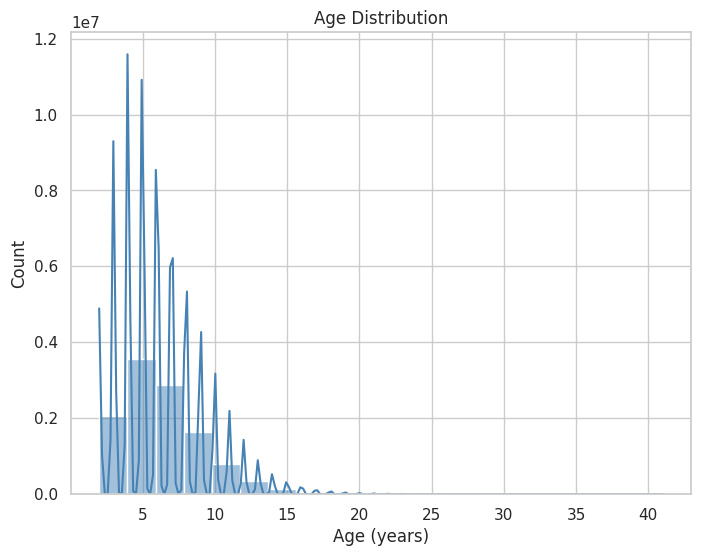

In [ ]:
# Visualizing distributions
# Set plot style
sns.set(style="whitegrid")

# Age distribution
plt.figure(figsize=(8,6))
sns.histplot(df_raw['drug_count'], bins=20, kde=True, color='steelblue')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Drug count distribution
plt.figure(figsize=(8,6))
sns.histplot(df['drug_count'], bins=15, kde=True, color='darkred')
plt.title('Drug Count per Prescription')
plt.xlabel('Number of Drugs')
plt.ylabel('Count')
plt.show()

In [ ]:
# Total interaction distribution
plt.figure(figsize=(8,6))
sns.histplot(df['interaction_count'], bins=20, kde=True, color='green')
plt.title('Total Interactions per Prescription')
plt.xlabel('Number of Interactions')
plt.ylabel('Count')
plt.show()

In [ ]:
# Moderate interactions distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Moderate'], bins=10, kde=True, color='orange')
plt.title('Moderate Interactions Distribution')
plt.xlabel('Number of Moderate Interactions')
plt.ylabel('Count')
plt.show()

In [ ]:
# Major interactions distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Major'], bins=10, kde=True, color='red')
plt.title('Major Interactions Distribution')
plt.xlabel('Number of Major Interactions')
plt.ylabel('Count')
plt.show()

In [ ]:
# Contraindicated interactions distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Contraindicated'], bins=10, kde=True, color='purple')
plt.title('Contraindicated Interactions Distribution')
plt.xlabel('Number of Contraindicated Interactions')
plt.ylabel('Count')
plt.show()

In [ ]:
# Save summary statistics and plots
interaction_summary.to_csv("interaction_summary.csv")
plt.figure(figsize=(8,6))
sns.histplot(df['age_years'], bins=20, kde=True, color='steelblue')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.savefig('age_distribution.png')

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['drug_count'], bins=15, kde=True, color='darkred')
plt.title('Drug Count per Prescription')
plt.xlabel('Number of Drugs')
plt.ylabel('Count')
plt.savefig('drug_count_distribution.png')

In [ ]:
# Group by 'specialty' and calculate the mean of 'interaction_count' for each group
average_interaction_count = df.groupby('pre_month')['Contraindicated'].mean()
sorted_average_interaction_count = average_interaction_count.sort_values(ascending=False)
# Print the result
sorted_average_interaction_count

,Contraindicated
pre_month,
12,0.135058
1,0.132810
7,0.124908
5,0.123683
8,0.122723
11,0.108696
10,0.103972
4,0.101123
6,0.100986


In [ ]:
df_unique = df_sex1.drop_duplicates(subset = 'natinal_id').copy()

In [ ]:
df_unique[df_unique['pre_id'] == 1].nunique()

2365811

In [ ]:
# Classify 'age_years' into four classes
bins = [-1, 18, 39, 64, float('inf')]  # Define the age bins
labels = ['0-18', '19-39', '40-64', '65+']  # Labels for each class
df_unique.loc[:, 'age_group'] = pd.cut(df_unique['age_years'], bins=bins, labels=labels, right=True)
#df.to_csv('salam.csv')

In [ ]:
age_group_absolute = df_unique['age_group'].value_counts()
age_group_absolute

,count
age_group,
40-64,263316
65+,130758
19-39,112405
0-18,62706


In [ ]:
# Calculate the prevalence of each age group
age_group_prevalence = df_unique['age_group'].value_counts(normalize=True) * 100  # in percentage
age_group_prevalence

,proportion
age_group,
40-64,46.044380
65+,28.187670
19-39,15.101164
0-18,10.666786


In [ ]:
df_sex1 = df_unique

In [ ]:
# Calculate the average 'drug_interaction_count' for each age group
average_drug_interactions = df.groupby('age_group')['interaction_count'].mean()
average_drug_interactions
# Print the results
#print("Prevalence of each age group:")
#print(age_group_prevalence)
#print("\nAverage drug interactions for each age group:")
#print(average_drug_interactions)

<ipython-input-38-20ab2227c32c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_drug_interactions = df.groupby('age_group')['interaction_count'].mean()


,interaction_count
age_group,
0-18,1.542235
19-39,2.002916
40-64,2.364392
65+,2.757295
